### Tarea 7.6 Eric Cárdenas 19.819.900-1

Use cinco puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \sinh(x)$ entre $x = -5$ y $x = 5$. Grafique el polinomio. Estime el error cometido para cada $x$, usando la fórmula de error de los polinomios de Legendre. Luego grafique $|f(x) - P(x)|$ y compare con el error estimado.

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [117]:
def lagrange(x, puntos):
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)




#Defino los puntos equidistantes, en este caso preferí elegir el 0.5 ya que con el valor 0 iba a ser muy tribial
puntos = np.array([[-4,-27.289], [-2.5,-6.050], [0.5, 0.521], [2.5, 6.050], [4.5, 45.003]])


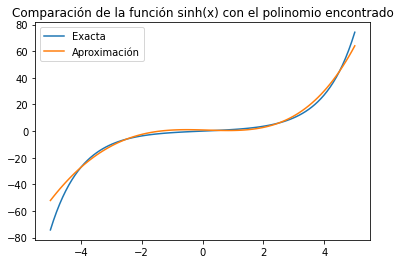

In [119]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.sinh(x), label="Exacta")
plt.plot(x, [lagrange(xi, puntos) for xi in x], label="Aproximación")
plt.legend()
plt.title("Comparación de la función sinh(x) con el polinomio encontrado")
plt.show()

In [120]:
def difer(puntos):
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [121]:
coef = difer(puntos)

In [122]:
def poly(x, coefs):
    return sum(coef[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

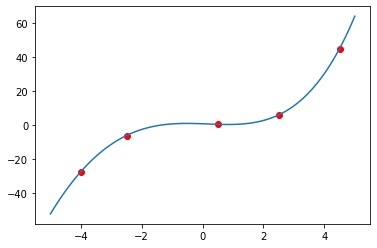

In [123]:
x = np.linspace(-5, 5, 100)
plt.plot(x, [poly(xi, coef) for xi in x])
plt.scatter(puntos[:,0], puntos[:,1], color='red')

#### Ahora comparamos los valores encontrados


In [141]:
f = np.sinh(x)
p = [lagrange(xi, puntos) for xi in x]
resta =(f-p)

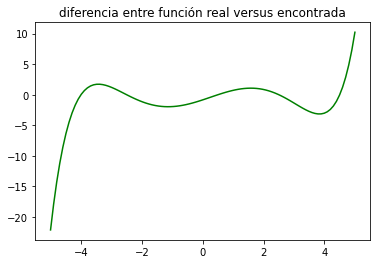

In [142]:
plt.title("diferencia entre función real versus encontrada")
plt.plot(x, resta, color = "green")
plt.show()

# Calificación: 6.0

Faltó comparar con la cota de error.